In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams

params = EnvParams(
    use_traffic_light=False,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
env = JaywalkEnv(params)

In [3]:
from src.agents.dqn.dqn_agent import DQNAgent


agents = []
training_results = []

for replay_buffer_size in [125_000, 250_000, 500_000]:
    for lr in [1e-3, 1e-4]:
        train_parameters = {
            "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
            "action_dim": 3,
            "action_space": [0, 1, 2],
            "num_layers": 4,
            "hidden_dim": 64,
            "gamma": 0.99,
            "total_training_time_step": 500_000,
            "epsilon_start_value": 1.0,
            "epsilon_end_value": 0.05,
            "epsilon_duration": 250000,
            "replay_buffer_size": replay_buffer_size,
            "start_training_step": 500,
            "freq_update_behavior_policy": 4,
            "freq_update_target_policy": 10_000,
            "batch_size": 32,
            "learning_rate": lr,
            "model_name": None,
            "device": "cpu",
            "replay_buffer_prepopulate_size": 50000,
            "scheduler_type": "linear",
        }

        agent = DQNAgent(env, train_parameters)
        result = agent.train(train_parameters["total_training_time_step"])

        filename = f"../checkpoints/dqn_rb_{replay_buffer_size}_lr_{lr:.0e}.pt"
        agent.save(filename)

        agents.append(agent)
        training_results.append(result)

100%|██████████| 500000/500000 [03:49<00:00, 2178.23it/s]


Agent's state has been saved to ../checkpoints/dqn_rb_125000_lr_1e-03.pt


100%|██████████| 500000/500000 [03:50<00:00, 2166.90it/s]


Agent's state has been saved to ../checkpoints/dqn_rb_125000_lr_1e-04.pt


100%|██████████| 500000/500000 [05:39<00:00, 1474.81it/s]


Agent's state has been saved to ../checkpoints/dqn_rb_250000_lr_1e-03.pt


100%|██████████| 500000/500000 [05:47<00:00, 1436.88it/s]


Agent's state has been saved to ../checkpoints/dqn_rb_250000_lr_1e-04.pt


100%|██████████| 500000/500000 [07:52<00:00, 1058.32it/s]


Agent's state has been saved to ../checkpoints/dqn_rb_500000_lr_1e-03.pt


100%|██████████| 500000/500000 [07:51<00:00, 1060.94it/s]


Agent's state has been saved to ../checkpoints/dqn_rb_500000_lr_1e-04.pt


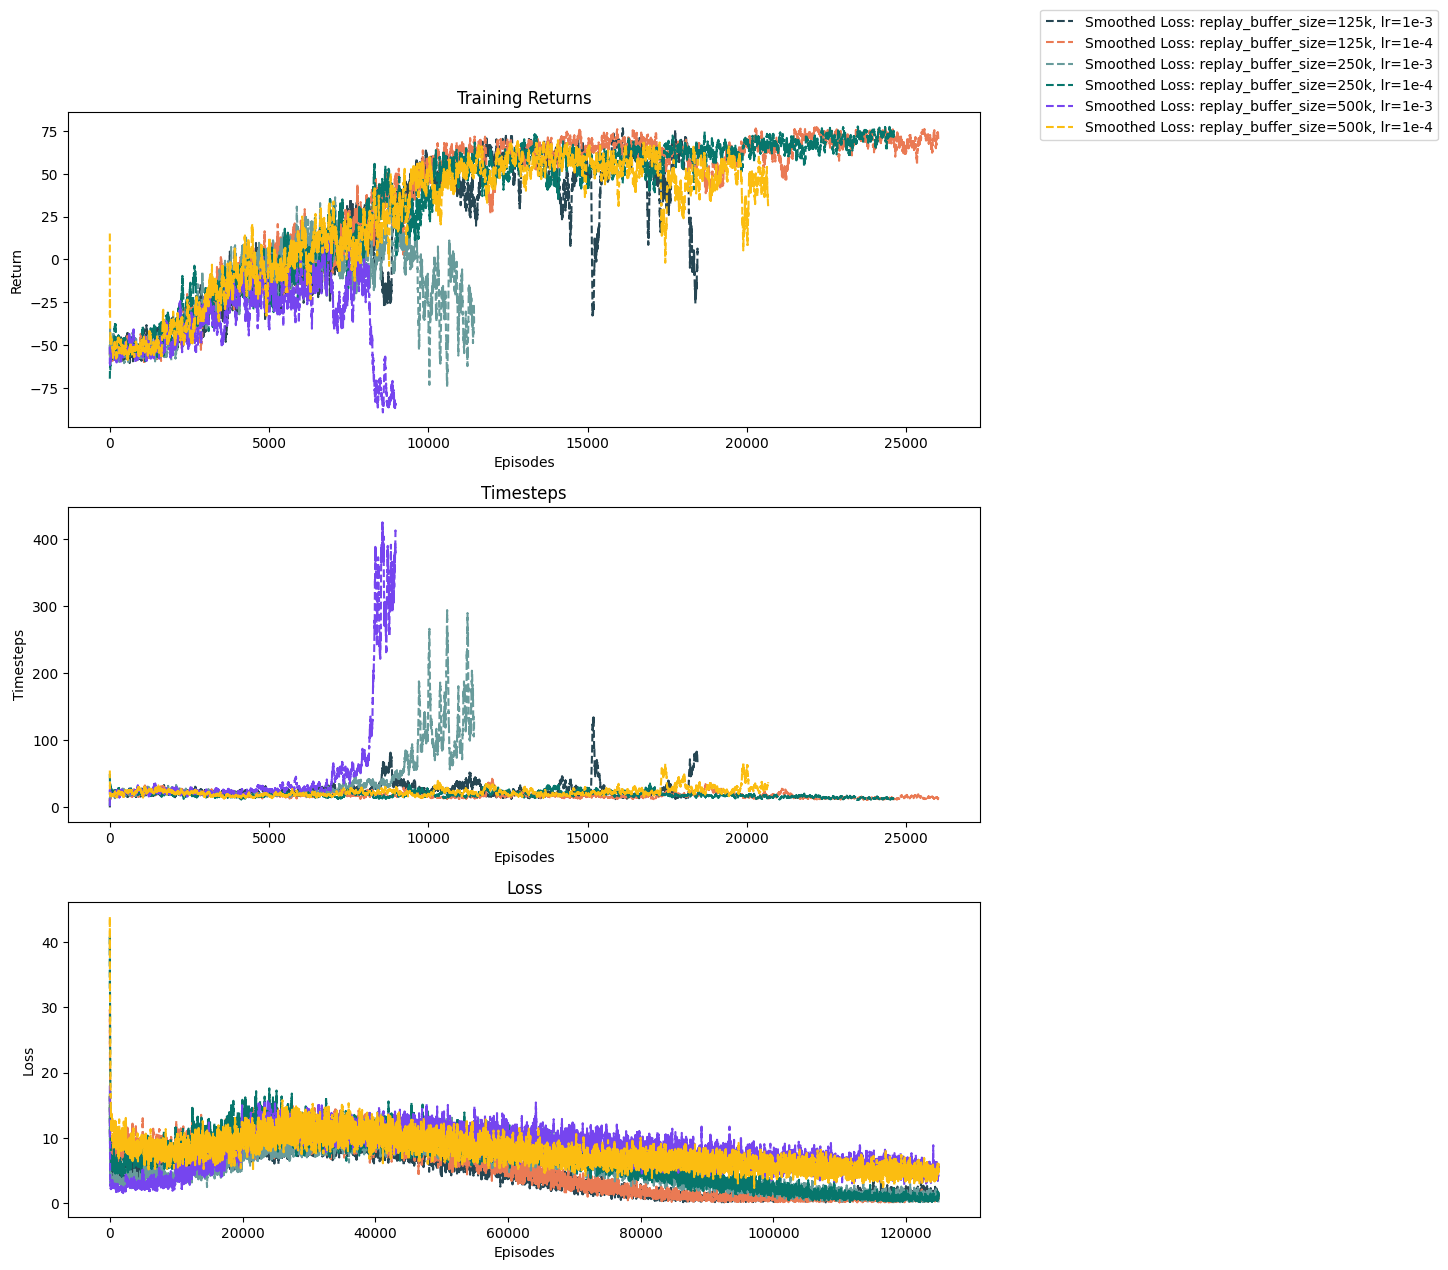

In [26]:
DQNAgent.plot_multiple_training_result(
    training_results=[*training_results],
    hyperparams=[
        "replay_buffer_size=125k, lr=1e-3",
        "replay_buffer_size=125k, lr=1e-4",
        "replay_buffer_size=250k, lr=1e-3",
        "replay_buffer_size=250k, lr=1e-4",
        "replay_buffer_size=500k, lr=1e-3",
        "replay_buffer_size=500k, lr=1e-4",
    ],
)